# Trainig a Model Using the MNIST datase for recgonise hand-writen digits
    On this notebook we show how to create a model using  MNIST dataset.
    We start showing how to read the bits from the dataset



  [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) 

In [ ]:
import display.mnistReader as r

In [13]:
from tkinter import *


master = Tk()

canvas_width = 280
canvas_height = 280
w = Canvas(master,
           width=canvas_width,
           height=canvas_height)
w.pack()

x1, y1, x2, y2 = 0, 0, 10, 10
#x2, y2 = 10, 10

reader = r.Reader('mnist/t10k-labels-idx1-ubyte.gz',
                  'mnist/t10k-images-idx3-ubyte.gz')

image = [[0 for x in range(28)]
         for y in range(28)]
reader.getImageArray2D1(8, image)
reader.printLabel(8)
for k in range(0, 28):
    for j in range(0, 28):
        number = image[k][j]
        color = "#" + str(hex(number)[2:5]) + \
            str(hex(number)[2:5]) + str(hex(number)[2:5])
        w.create_rectangle(x1, y1, x2, y2, fill=color)
        x1, x2 = x1 + 10, x2 + 10
    x1, y1, x2, y2 = 0, y1 + 10, 10, y2 + 10


mainloop()

Labels Magic Number:2049
total:10000
Images Magic Number:2051
total:10000
Row/Col: 28/28
9


In [11]:


import numpy as np

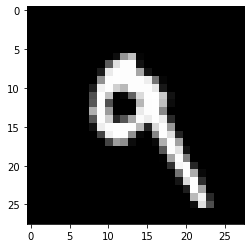

In [23]:
image = ~np.array(image)

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')



In [24]:
import keras as kr

ModuleNotFoundError: No module named 'keras'

In [32]:


from platform import python_version

print(python_version())

3.7.3
